In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [62]:
ami = pd.read_csv('./data/ami-uniq.txt', sep='\t')
ami['datetime'] = pd.to_datetime(ami['datetime'], format='%Y-%m-%d %H:%M:%S')
weather = pd.read_csv('./data/WeatherData_Zipcode_77088.csv')
weather = weather.drop(columns=['LocalDateTime', 'TimeZone'])

In [12]:
weather.head()

,UTCDateTime,OutdoorTemp,OutdoorHumidity,SolarIrradiance,WindSpeedMps
0,11/17/2017 12:00:00 AM,72.9,86,5,3.0
1,11/17/2017 12:15:00 AM,72.6,87,4,3.0
2,11/17/2017 12:30:00 AM,72.4,88,2,3.0
3,11/17/2017 12:45:00 AM,72.2,89,1,3.0
4,11/17/2017 01:00:00 AM,72.0,90,0,3.0


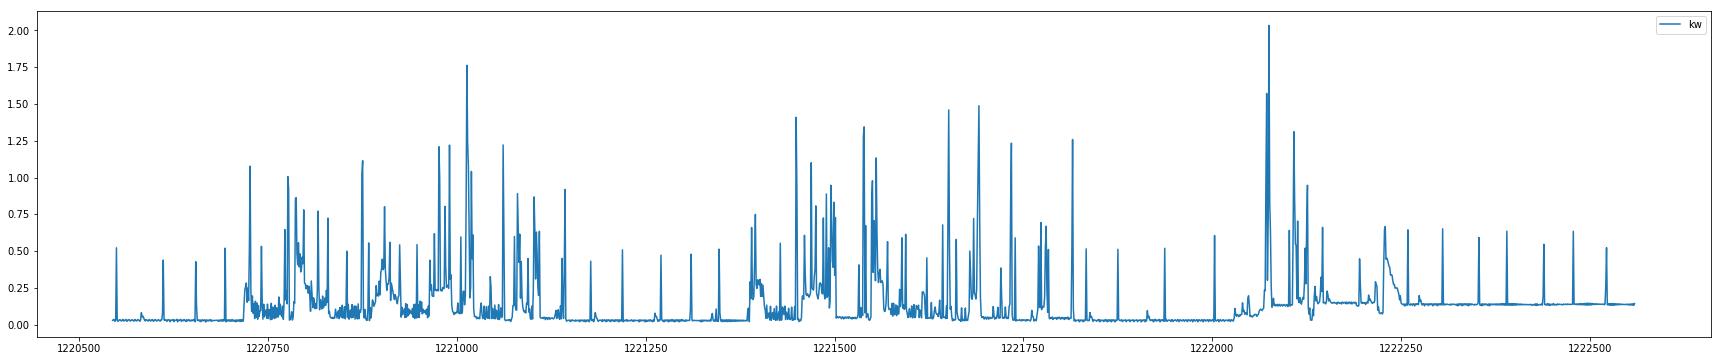

In [66]:
ami.loc[ami['id']==81].plot(y='kw', figsize=(30,6))

In [5]:
ami.loadzone.unique()

array(['LZ_NORTH', 'LZ_HOUSTON', 'LZ_SOUTH', 'LZ_WEST'], dtype=object)

In [6]:
ami_ids_houston = ami.loc[ami['loadzone']=='LZ_HOUSTON'].id.unique()
ami_ids_houston

array([ 3,  5,  6,  7, 11, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 27,
       28, 30, 32, 33, 34, 35, 36, 37, 39, 41, 43, 50, 51, 52, 53, 54, 55,
       56, 59, 60, 61, 62, 64, 65, 66, 67, 68, 70, 74, 75, 79, 80, 81, 85,
       87, 88, 91, 93, 95, 96])

In [7]:
ami.loc[ami['loadzone']=='LZ_HOUSTON'].zip.unique()

array([77339, 77038, 77459, 77563, 77040, 77433, 77048, 77520, 77095,
       77375, 77531, 77479, 77018, 77581, 77407, 77059, 77066, 77494,
       77441, 77373, 77573, 77064, 77073, 77377, 77062, 77019, 77388,
       77379, 77429, 77086, 77070, 77493, 77584, 77386, 77002, 77346,
       77035, 77406, 77082, 77389, 77523, 77521, 77088])

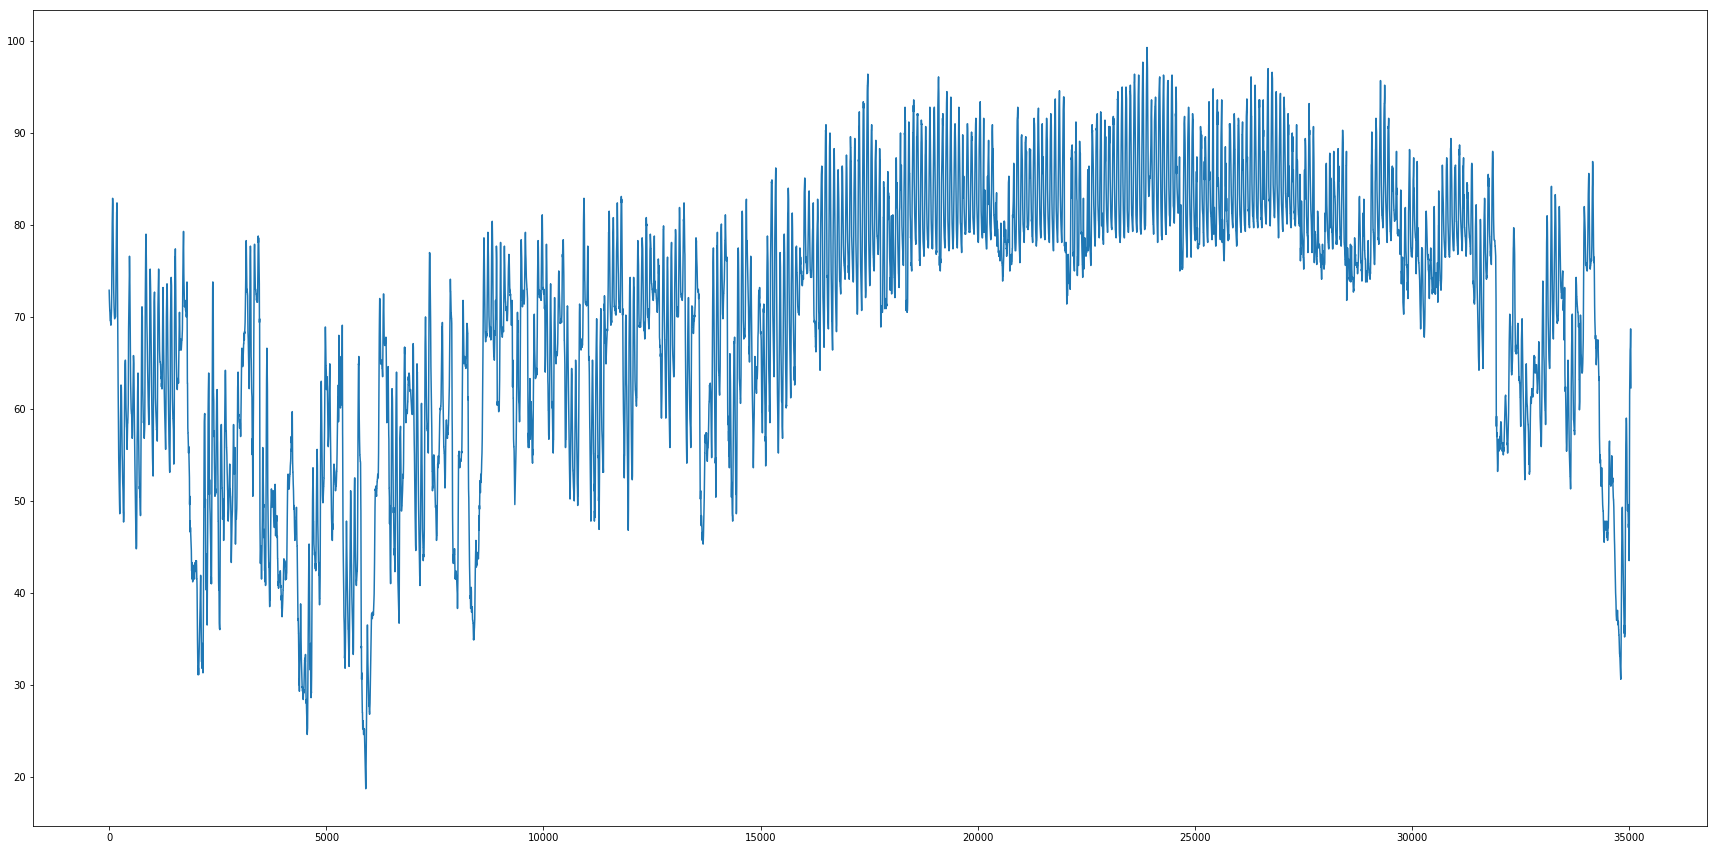

In [8]:
weather.OutdoorTemp.plot(figsize=(30,15))

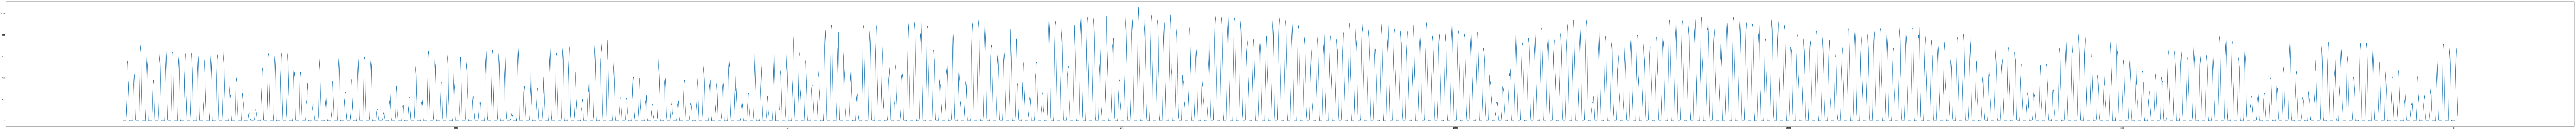

In [14]:
weather.SolarIrradiance.plot(figsize=(300,15))

In [63]:
ami.groupby('id').count()

,datetime,kw,zip,loadzone
id,,,,
1,17276,17276,17276,17276
2,17180,17179,17180,17180
3,17180,17180,17180,17180
4,864,864,864,864
5,16892,16892,16892,16892
6,17180,17098,17180,17180
7,12956,12956,12956,12956
8,17948,17948,17948,17948
9,17084,17080,17084,17084


In [85]:
series_kw = ami.pivot(index='id', columns='datetime', values='kw')

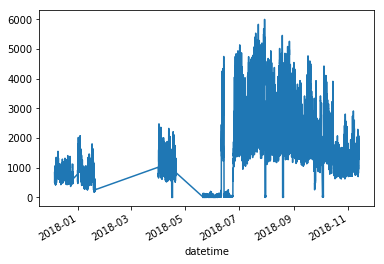

In [89]:
series_kw.rolling(96*4, min_periods = 1).sum().sum().plot()

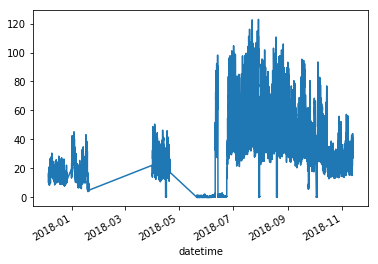

In [87]:
series_kw.sum(axis=0).plot()